### Keras and Tensorflow Neural Network (NN)

In [4]:
import pandas as pd
from processing_utils import *

raw_dataset = pd.read_csv('./dataset/data.csv')

pruned_dataset = prune_dataset_lines(raw_dataset, remove_nan_lines=False, remove_nan_cols=True)
print("Raw dataset shape =", raw_dataset.shape, " Pruned dataset shape =", pruned_dataset.shape)

encoded_pruned_data = encode_smiles_column_of(pruned_dataset, 'count_encoding') # change to one_hot_encoding here
print("Encoded dataset shape =", encoded_pruned_data.shape)

X_train, y_train, X_test, y_test = return_required_data(
    encoded_pruned_data, 
    ['Energy_(kcal/mol)', 'Energy DG:kcal/mol)'], 
    normalize=True
)

Raw dataset shape = (39926, 24)  Pruned dataset shape = (12865, 6)
Encoded dataset shape = (12865, 35)


In [6]:
from tensorflow import keras

num_features = X_train.shape[1]

tiny_model = keras.Sequential([
    keras.layers.Dense(64, activation='elu', input_dim=33),
    keras.layers.Dense(2)
])

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
tiny_model.compile(loss='mse', optimizer='sgd', metrics=['mse'])


(9005, 33) (9005, 2) (3860, 33) (3860, 2)


In [7]:
histories = {}
histories['Tiny'] = tiny_model.fit(X_train, y_train, epochs=150, batch_size=500, validation_data=(X_test, y_test))

Epoch 1/150
19/19 [==============================] - 0s 8ms/step - loss: 0.5737 - mse: 0.5737 - val_loss: 0.3610 - val_mse: 0.3610
Epoch 2/150
19/19 [==============================] - 0s 3ms/step - loss: 0.2788 - mse: 0.2788 - val_loss: 0.2132 - val_mse: 0.2132
Epoch 3/150
19/19 [==============================] - 0s 3ms/step - loss: 0.1806 - mse: 0.1806 - val_loss: 0.1538 - val_mse: 0.1538
Epoch 4/150
19/19 [==============================] - 0s 3ms/step - loss: 0.1361 - mse: 0.1361 - val_loss: 0.1243 - val_mse: 0.1243
Epoch 5/150
19/19 [==============================] - 0s 3ms/step - loss: 0.1121 - mse: 0.1121 - val_loss: 0.1043 - val_mse: 0.1043
Epoch 6/150
19/19 [==============================] - 0s 3ms/step - loss: 0.0947 - mse: 0.0947 - val_loss: 0.0906 - val_mse: 0.0906
Epoch 7/150
19/19 [==============================] - 0s 3ms/step - loss: 0.0824 - mse: 0.0824 - val_loss: 0.0794 - val_mse: 0.0794
Epoch 8/150
19/19 [==============================] - 0s 3ms/step - loss: 0.0726 - m

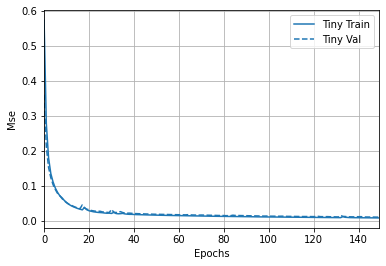

In [8]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots

plotter = tfdocs.plots.HistoryPlotter(metric='mse')
plotter.plot(histories)


In [9]:

fat_model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_dim=33),
    keras.layers.Dense(512, activation='relu', input_dim=512),
    keras.layers.Dense(512, activation='relu', input_dim=512),
    keras.layers.Dense(512, activation='relu', input_dim=512),
    keras.layers.Dense(2)
])

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
fat_model.compile(loss='mse', optimizer='sgd', metrics=['mse'])


(9005, 33) (9005, 2) (3860, 33) (3860, 2)


In [10]:
histories['Fat'] = fat_model.fit(X_train, y_train, epochs=150, batch_size=500, validation_data=(X_test, y_test))

Epoch 1/1000
19/19 [==============================] - 1s 22ms/step - loss: 0.9277 - mse: 0.9277 - val_loss: 0.8052 - val_mse: 0.8052
Epoch 2/1000
19/19 [==============================] - 0s 20ms/step - loss: 0.7078 - mse: 0.7078 - val_loss: 0.5841 - val_mse: 0.5841
Epoch 3/1000
19/19 [==============================] - 0s 21ms/step - loss: 0.4843 - mse: 0.4843 - val_loss: 0.3778 - val_mse: 0.3778
Epoch 4/1000
19/19 [==============================] - 0s 19ms/step - loss: 0.3002 - mse: 0.3002 - val_loss: 0.2316 - val_mse: 0.2316
Epoch 5/1000
19/19 [==============================] - 0s 19ms/step - loss: 0.1822 - mse: 0.1822 - val_loss: 0.1478 - val_mse: 0.1478
Epoch 6/1000
19/19 [==============================] - 0s 19ms/step - loss: 0.1198 - mse: 0.1198 - val_loss: 0.1345 - val_mse: 0.1345
Epoch 7/1000
19/19 [==============================] - 0s 21ms/step - loss: 0.0962 - mse: 0.0962 - val_loss: 0.0855 - val_mse: 0.0855
Epoch 8/1000
19/19 [==============================] - 0s 19ms/step - 

KeyboardInterrupt: 

NameError: name 'tfdocs' is not defined

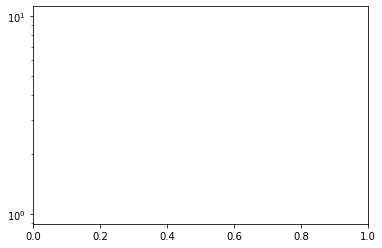

In [1]:
import matplotlib.pyplot as plt

plt.yscale("log")
plotter = tfdocs.plots.HistoryPlotter(metric='mse')
plotter.plot(histories)

print(mean_squared_error(y_test[:10, :], fat_model.predict(X_test[:10, :])))